In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.preprocessing.image import array_to_img
import numpy as np
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout



In [2]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.8 MB/s eta 0:00:00


In [3]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

len(set(y_train))

(60000, 28, 28, 1)


10

In [5]:
i = Input(shape=X_train[0].shape)
x=Conv2D(32, (3, 3), strides =2,activation='relu')(i)
x=Conv2D(64, (3, 3), strides =2,activation='relu')(x)
x=Conv2D(128, (3, 3), strides =2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7499 - loss: 0.6845 - val_accuracy: 0.8553 - val_loss: 0.3948
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8598 - loss: 0.3743 - val_accuracy: 0.8656 - val_loss: 0.3621
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8799 - loss: 0.3164 - val_accuracy: 0.8831 - val_loss: 0.3173
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8918 - loss: 0.2846 - val_accuracy: 0.8860 - val_loss: 0.3110
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9061 - loss: 0.2486 - val_accuracy: 0.8867 - val_loss: 0.3046


In [8]:
explainer = shap.DeepExplainer(model, X_train[:100]) #utiliza o explainer mais adequado para redes profundas
shap_values = explainer.shap_values(X_test[:10])

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


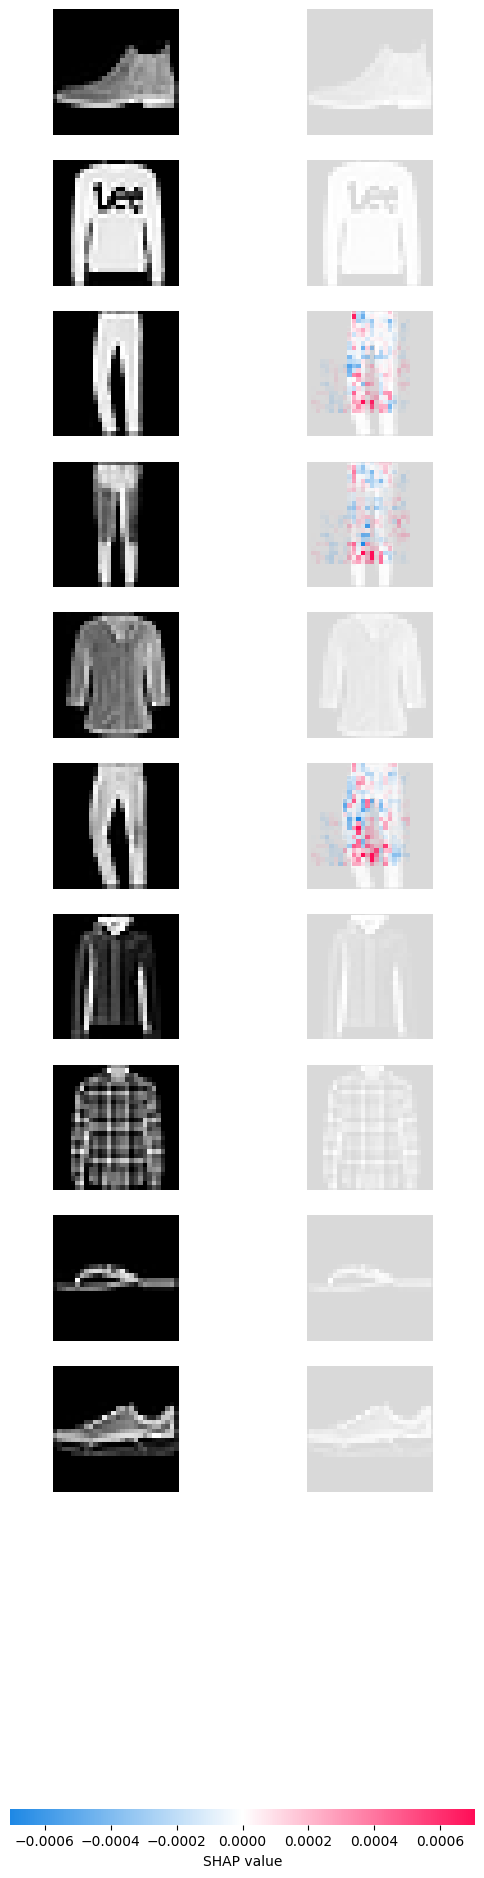

In [9]:
shap.image_plot([shap_values], X_test[:10]) # Os pixels vermelhos são os mais influentes, e os azuis influentes de forma negativa,
# na maioria dos casos apenas os contornos são analisados